<a href="https://colab.research.google.com/github/karol10542/deep_course/blob/main/number_plate_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
!pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=fb72e85072fc5eef4c71b13c66189a8945085783998164b6f53d6371958fa7f7
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [5]:
# pozowli czytać tekst z obrazu
import pytesseract


In [6]:
print(cv2.__version__)

4.1.2


In [11]:
#tworze funkcje ktora ustawi obrazy kolo siebie w celu zweryfikowania wprowadzonych zmian
def plot_images(img1,img2,title1="",title2=""):
  fig=plt.figure(figsize=(15,15))
  ax1=fig.add_subplot(121)
  ax1.imshow(img1,cmap="gray")
  ax1.set(xticks=[],yticks=[],title=title1)

  
  ax2=fig.add_subplot(122)
  ax2.imshow(img2,cmap="gray")
  ax2.set(xticks=[],yticks=[],title=title2)

In [14]:
path = "/var/Cars96.png"

image=cv2.imread(path)

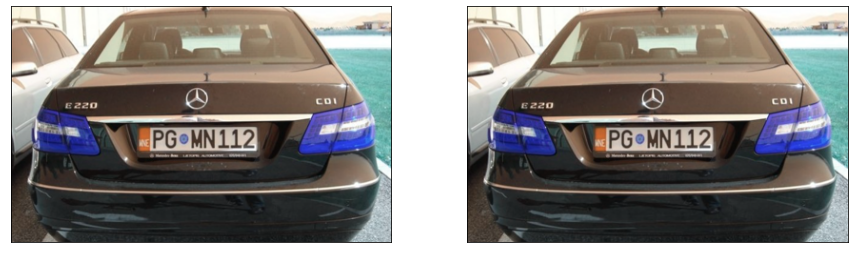

In [15]:
plot_images(image,image)

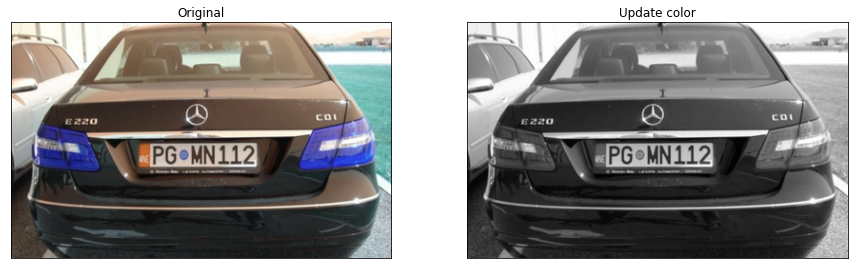

In [16]:
#konwertujemy kolory obrazu na odcienie szarosci, co zmniejszy obciazenie procesora i zmniejszy czas wykonywania

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plot_images(image,gray,title1="Original",title2="Update color")

In [33]:
#nakładamy filtr ktory rozmyje background
blur=cv2.bilateralFilter(gray,10,35,35)

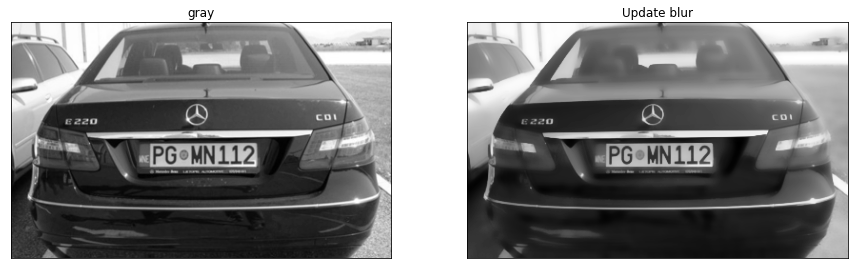

In [34]:
plot_images(gray,blur,title1="gray",title2="Update blur")

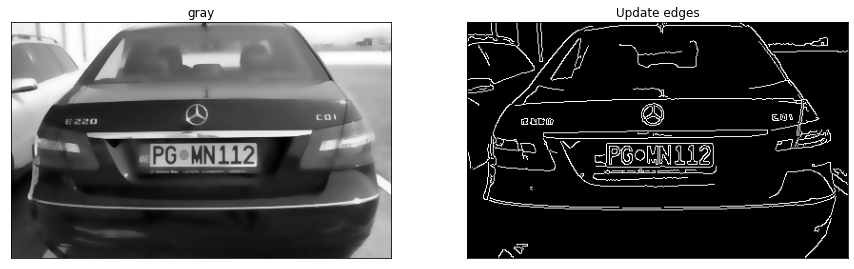

In [35]:
edges=cv2.Canny(blur,30,200)
plot_images(blur,edges,title1="gray",title2="Update edges")

In [36]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [37]:
image_copy = image.copy()

In [38]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

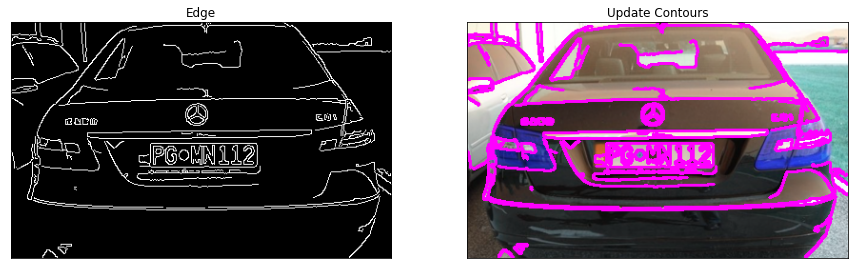

In [42]:
plot_images(edges,image_copy,title1="Edge",title2="Update Contours")

In [43]:
print(len(cnts))

107


In [59]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:1]

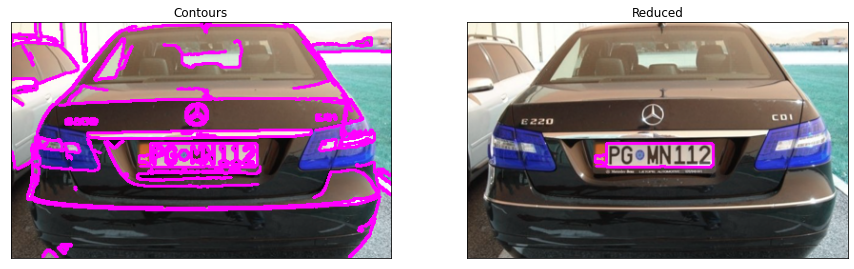

In [60]:
image_reduced_cnts = image.copy()
_=cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,title1='Contours',title2='Reduced')

In [61]:
print(len(cnts))

1


TypeError: ignored

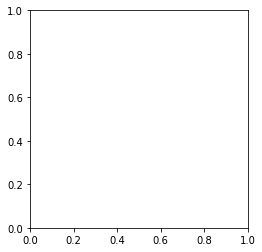

In [77]:
plate = None
for c in cnts:
  perimeter = cv2.arcLength(c,True)
  edges_count = cv2.approxPolyDP(c,0.02 * perimeter,True)
  if len(edges_count)  ==4:
    x,y,w,h=cv2.boundingRect(c)
    plate = image[y:y+h,x:x+w]
    break


TypeError: ignored

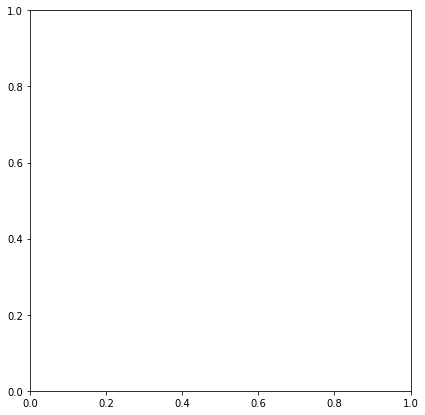